In [222]:
#RFM Analysis for coffe shop data

In [223]:
#import the libaries

In [224]:
import sqlite3
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [225]:
#import the files to dataframes

In [226]:
customers = pd.read_csv("D:\\DataSets\\customer_level_data_coffeshop.csv")
items = pd.read_csv("D:\\DataSets\\item_level_data_coffeshop.csv")
transactions = pd.read_csv("D:\\DataSets\\transaction_level_data_coffeeshop.csv")

In [227]:
#check details for customers

In [228]:
customers.info()
customers.shape
customers.head()
customers.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10767 entries, 0 to 10766
Data columns (total 6 columns):
customer_number                      10767 non-null int64
app_install_time                     10767 non-null object
gender                               10557 non-null object
marital_status                       2 non-null object
date_of_birth                        10767 non-null object
referral_as_source_of_app_install    10767 non-null object
dtypes: int64(1), object(5)
memory usage: 504.8+ KB


(10767, 6)

,customer_number,app_install_time,gender,marital_status,date_of_birth,referral_as_source_of_app_install
0,1,2018-06-29 20:40:12,MALE,NaN,2018-06-05,Not_through_referral
1,2,2018-07-03 19:11:13,FEMALE,NaN,1998-12-08,Not_through_referral
2,3,2018-07-21 12:03:39,FEMALE,NaN,1997-11-19,Installed_through_referral
3,4,2018-07-23 18:22:37,MALE,NaN,2018-01-11,Not_through_referral
4,5,2018-08-03 01:40:45,MALE,NaN,1982-08-19,Not_through_referral


,customer_number,app_install_time,gender,marital_status,date_of_birth,referral_as_source_of_app_install
10762,10763,2018-08-29 01:31:36,FEMALE,NaN,1991-10-01,Not_through_referral
10763,10764,2018-08-20 17:28:18,MALE,NaN,1994-11-24,Not_through_referral
10764,10765,2018-08-17 20:02:05,FEMALE,NaN,1998-10-22,Installed_through_referral
10765,10766,2018-09-10 01:21:29,MALE,NaN,1997-07-14,Not_through_referral
10766,10767,2018-09-25 16:50:00,MALE,NaN,2017-05-04,Installed_through_referral


In [229]:
#convert to date_time
customers['app_install_time'] = pd.to_datetime(customers['app_install_time'])

In [230]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10767 entries, 0 to 10766
Data columns (total 6 columns):
customer_number                      10767 non-null int64
app_install_time                     10767 non-null datetime64[ns]
gender                               10557 non-null object
marital_status                       2 non-null object
date_of_birth                        10767 non-null object
referral_as_source_of_app_install    10767 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 504.8+ KB


In [231]:
#check null records
customers.shape
pd.isnull(customers).any()
pd.isnull(customers).sum()

(10767, 6)

customer_number                      False
app_install_time                     False
gender                                True
marital_status                        True
date_of_birth                        False
referral_as_source_of_app_install    False
dtype: bool

customer_number                          0
app_install_time                         0
gender                                 210
marital_status                       10765
date_of_birth                            0
referral_as_source_of_app_install        0
dtype: int64

In [232]:
#check details for items

In [233]:
items.shape
items.info()
items.head()
pd.isnull(items).any()
pd.isnull(items).sum()

(17972, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17972 entries, 0 to 17971
Data columns (total 4 columns):
transaction_number    17972 non-null int64
customer_number       17972 non-null int64
item_name             17698 non-null object
sale_amount           17972 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 561.7+ KB


,transaction_number,customer_number,item_name,sale_amount
0,463,3050,TOPPING SYRUPS,150.5
1,465,10736,MISCELLANEOUS,199.5
2,467,3815,LATTE HOT COFFEE,118.0
3,469,8590,AMERICAN HOT COFFEE,72.5
4,471,3315,COMBO24,177.0


transaction_number    False
customer_number       False
item_name              True
sale_amount           False
dtype: bool

transaction_number      0
customer_number         0
item_name             274
sale_amount             0
dtype: int64

In [234]:
#check details for transactions

In [235]:
transactions.shape
transactions.info()
transactions.head()
pd.isnull(transactions).any()
pd.isnull(transactions).sum()

(17164, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17164 entries, 0 to 17163
Data columns (total 7 columns):
transaction_number                               17164 non-null int64
customer_number                                  17164 non-null int64
transaction_time                                 17164 non-null object
store_name                                       17164 non-null object
sale_amount_including_loyalty_points_used        17164 non-null float64
loyalty_points_used_by_customer                  17164 non-null float64
offer_used_by_customer_to_earn_loyalty_points    4624 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 938.7+ KB


,transaction_number,customer_number,transaction_time,store_name,sale_amount_including_loyalty_points_used,loyalty_points_used_by_customer,offer_used_by_customer_to_earn_loyalty_points
0,463,3050,6/1/2018 15:42,MUMBAI STORE 333,150.5,0.0,NaN
1,465,10736,6/1/2018 15:43,KANCHIPURAM STORE 72,199.5,0.0,NaN
2,467,3815,6/1/2018 17:34,CHENNAI STORE 1093,118.0,0.0,NaN
3,469,8590,6/1/2018 17:52,DHANBAD STORE 817,72.5,0.0,NaN
4,471,3315,6/1/2018 17:56,MADURAI STORE 54,177.0,0.0,NaN


transaction_number                               False
customer_number                                  False
transaction_time                                 False
store_name                                       False
sale_amount_including_loyalty_points_used        False
loyalty_points_used_by_customer                  False
offer_used_by_customer_to_earn_loyalty_points     True
dtype: bool

transaction_number                                   0
customer_number                                      0
transaction_time                                     0
store_name                                           0
sale_amount_including_loyalty_points_used            0
loyalty_points_used_by_customer                      0
offer_used_by_customer_to_earn_loyalty_points    12540
dtype: int64

In [236]:
#convert to datetime
transactions['transaction_time'] = pd.to_datetime(transactions['transaction_time'])

In [237]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17164 entries, 0 to 17163
Data columns (total 7 columns):
transaction_number                               17164 non-null int64
customer_number                                  17164 non-null int64
transaction_time                                 17164 non-null datetime64[ns]
store_name                                       17164 non-null object
sale_amount_including_loyalty_points_used        17164 non-null float64
loyalty_points_used_by_customer                  17164 non-null float64
offer_used_by_customer_to_earn_loyalty_points    4624 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 938.7+ KB


In [334]:
#Perform Exploratory Data Analysis

In [335]:
#Anayze customers data

In [336]:
customers.head()

,customer_number,app_install_time,gender,marital_status,date_of_birth,referral_as_source_of_app_install
0,1,2018-06-29 20:40:12,MALE,NaN,2018-06-05,Not_through_referral
1,2,2018-07-03 19:11:13,FEMALE,NaN,1998-12-08,Not_through_referral
2,3,2018-07-21 12:03:39,FEMALE,NaN,1997-11-19,Installed_through_referral
3,4,2018-07-23 18:22:37,MALE,NaN,2018-01-11,Not_through_referral
4,5,2018-08-03 01:40:45,MALE,NaN,1982-08-19,Not_through_referral


In [337]:
#check gender wise distribution
pd.crosstab(index=customers['gender'], columns='Frequency')

col_0,Frequency
gender,
FEMALE,2531
MALE,8026


In [338]:
import seaborn as sns

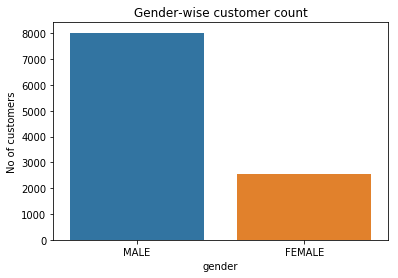

In [561]:
#fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x='gender',data = customers)
plt.ylabel('No of customers')
plt.title("Gender-wise customer count")
plt.show();

In [340]:
#check referral wise distribution

In [341]:
pd.crosstab(index=customers['referral_as_source_of_app_install'], columns='Frequency')

col_0,Frequency
referral_as_source_of_app_install,
Installed_through_referral,3085
Not_through_referral,7682


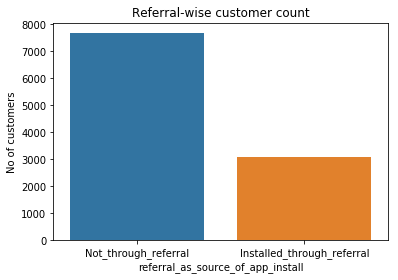

In [562]:
#fig, ax = plt.subplots(figsize = (10,10))
sns.countplot(x='referral_as_source_of_app_install',data = customers)
plt.ylabel('No of customers')
plt.title("Referral-wise customer count")
plt.show();

In [343]:
#Analyze Transactions Data

In [345]:
#Find Offer-wise Sales Distribution

In [347]:
transactions.head()
transactions.info()
transactions.columns

,transaction_number,customer_number,transaction_time,store_name,sale_amount_including_loyalty_points_used,loyalty_points_used_by_customer,offer_used_by_customer_to_earn_loyalty_points
0,463,3050,2018-06-01 15:42:00,MUMBAI STORE 333,150.5,0.0,NaN
1,465,10736,2018-06-01 15:43:00,KANCHIPURAM STORE 72,199.5,0.0,NaN
2,467,3815,2018-06-01 17:34:00,CHENNAI STORE 1093,118.0,0.0,NaN
3,469,8590,2018-06-01 17:52:00,DHANBAD STORE 817,72.5,0.0,NaN
4,471,3315,2018-06-01 17:56:00,MADURAI STORE 54,177.0,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17164 entries, 0 to 17163
Data columns (total 7 columns):
transaction_number                               17164 non-null int64
customer_number                                  17164 non-null int64
transaction_time                                 17164 non-null datetime64[ns]
store_name                                       17164 non-null object
sale_amount_including_loyalty_points_used        17164 non-null float64
loyalty_points_used_by_customer                  17164 non-null float64
offer_used_by_customer_to_earn_loyalty_points    4624 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 938.7+ KB


Index(['transaction_number', 'customer_number', 'transaction_time',
       'store_name', 'sale_amount_including_loyalty_points_used',
       'loyalty_points_used_by_customer',
       'offer_used_by_customer_to_earn_loyalty_points'],
      dtype='object')

In [348]:
#As there are many NaNs for 'offer_used_by_customer_to_earn_loyalty_points' column, so we will not use 
#this column for analysis

In [49]:
#CREATE A TABLE IN SQLITE DB
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
customers.to_sql('CUSTOMERS',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table CUSTOMERS got created successfully")
conn.close()

Opened database successfully
new table CUSTOMERS got created successfully


In [50]:
#CREATE A TABLE IN SQLITE DB
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
items.to_sql('ITEMS',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table ITEMS got created successfully")
conn.close()

Opened database successfully
new table ITEMS got created successfully


In [51]:
#CREATE A TABLE IN SQLITE DB
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
transactions.to_sql('TRANSACTIONS',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table TRANSACTIONS got created successfully")
conn.close()

Opened database successfully
new table TRANSACTIONS got created successfully


In [28]:
#create dataframe of customer and transactions

In [238]:
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
trans_cust_merge = pd.read_sql("select * from TRANS_CUST_MERGE",conn)
print ("records added to dataframe trans_cust_merge successfully")
conn.close()

Opened database successfully
records added to dataframe trans_cust_merge successfully


In [239]:
transactions.shape
customers.shape
trans_cust_merge.shape
trans_cust_merge.info()
trans_cust_merge.head()
trans_cust_merge.columns

(17164, 7)

(10767, 6)

(17164, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17164 entries, 0 to 17163
Data columns (total 15 columns):
index                                            17164 non-null int64
transaction_number                               17164 non-null int64
customer_number                                  17164 non-null int64
transaction_time                                 17164 non-null object
store_name                                       17164 non-null object
sale_amount_including_loyalty_points_used        17164 non-null float64
loyalty_points_used_by_customer                  17164 non-null float64
offer_used_by_customer_to_earn_loyalty_points    4624 non-null object
index:1                                          17164 non-null int64
customer_number:1                                17164 non-null int64
app_install_time                                 17164 non-null object
gender                                           17162 non-null object
marital_status                             

,index,transaction_number,customer_number,transaction_time,store_name,sale_amount_including_loyalty_points_used,loyalty_points_used_by_customer,offer_used_by_customer_to_earn_loyalty_points,index:1,customer_number:1,app_install_time,gender,marital_status,date_of_birth,referral_as_source_of_app_install
0,0,463,3050,2018-06-01 15:42:00,MUMBAI STORE 333,150.5,0.0,None,3049,3050,2018-06-01 15:40:24,MALE,None,2001-09-23,Not_through_referral
1,1,465,10736,2018-06-01 15:43:00,KANCHIPURAM STORE 72,199.5,0.0,None,10735,10736,2018-06-01 15:34:15,FEMALE,None,1999-07-26,Not_through_referral
2,2,467,3815,2018-06-01 17:34:00,CHENNAI STORE 1093,118.0,0.0,None,3814,3815,2018-06-01 17:26:23,FEMALE,None,1973-09-09,Not_through_referral
3,3,469,8590,2018-06-01 17:52:00,DHANBAD STORE 817,72.5,0.0,None,8589,8590,2018-06-01 17:09:19,MALE,None,2018-06-01,Not_through_referral
4,4,471,3315,2018-06-01 17:56:00,MADURAI STORE 54,177.0,0.0,None,3314,3315,2018-06-01 17:42:59,MALE,None,1982-04-30,Not_through_referral


Index(['index', 'transaction_number', 'customer_number', 'transaction_time',
       'store_name', 'sale_amount_including_loyalty_points_used',
       'loyalty_points_used_by_customer',
       'offer_used_by_customer_to_earn_loyalty_points', 'index:1',
       'customer_number:1', 'app_install_time', 'gender', 'marital_status',
       'date_of_birth', 'referral_as_source_of_app_install'],
      dtype='object')

In [240]:
#save to csv

In [349]:
trans_cust_merge.to_csv("D:\\datasets\\RFMCoffeeShop\\trans_cust_merge.csv")

In [242]:
import numpy as np

In [33]:
#create joined table for customer,items and transactins 

In [34]:
#execute following sql queries in sqlite

In [91]:
#create the dataframe

In [243]:
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
trans_items_cust_merge = pd.read_sql("select * from trans_items_cust_merge",conn)
print ("records added to dataframe trans_items_cust_merge successfully")
conn.close()

Opened database successfully
records added to dataframe trans_items_cust_merge successfully


In [244]:
trans_items_cust_merge.shape
trans_items_cust_merge.info()
trans_items_cust_merge.head()

(17972, 20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17972 entries, 0 to 17971
Data columns (total 20 columns):
index                                            17972 non-null int64
transaction_number                               17972 non-null int64
customer_number                                  17972 non-null int64
item_name                                        17698 non-null object
sale_amount                                      17972 non-null float64
index:1                                          17972 non-null int64
transaction_number:1                             17972 non-null int64
customer_number:1                                17972 non-null int64
transaction_time                                 17972 non-null object
store_name                                       17972 non-null object
sale_amount_including_loyalty_points_used        17972 non-null float64
loyalty_points_used_by_customer                  17972 non-null float64
offer_used_by_customer_to_earn_loyalty_poi

,index,transaction_number,customer_number,item_name,sale_amount,index:1,transaction_number:1,customer_number:1,transaction_time,store_name,sale_amount_including_loyalty_points_used,loyalty_points_used_by_customer,offer_used_by_customer_to_earn_loyalty_points,index:2,customer_number:2,app_install_time,gender,marital_status,date_of_birth,referral_as_source_of_app_install
0,0,463,3050,TOPPING SYRUPS,150.5,0,463,3050,2018-06-01 15:42:00,MUMBAI STORE 333,150.5,0.0,None,3049,3050,2018-06-01 15:40:24,MALE,None,2001-09-23,Not_through_referral
1,1,465,10736,MISCELLANEOUS,199.5,1,465,10736,2018-06-01 15:43:00,KANCHIPURAM STORE 72,199.5,0.0,None,10735,10736,2018-06-01 15:34:15,FEMALE,None,1999-07-26,Not_through_referral
2,2,467,3815,LATTE HOT COFFEE,118.0,2,467,3815,2018-06-01 17:34:00,CHENNAI STORE 1093,118.0,0.0,None,3814,3815,2018-06-01 17:26:23,FEMALE,None,1973-09-09,Not_through_referral
3,3,469,8590,AMERICAN HOT COFFEE,72.5,3,469,8590,2018-06-01 17:52:00,DHANBAD STORE 817,72.5,0.0,None,8589,8590,2018-06-01 17:09:19,MALE,None,2018-06-01,Not_through_referral
4,4,471,3315,COMBO24,177.0,4,471,3315,2018-06-01 17:56:00,MADURAI STORE 54,177.0,0.0,None,3314,3315,2018-06-01 17:42:59,MALE,None,1982-04-30,Not_through_referral


In [350]:
#save into csv
trans_items_cust_merge.to_csv("D:\\DataSets\\RFMCoffeeShop\\trans_items_cust_merge.csv")

In [246]:
#Customer segmentation analysis

In [95]:
#create the dataframe

In [268]:
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
rfmsegmentation = pd.read_sql("select * from RFMSEGMENTATION",conn)
print ("records added to dataframe rfmsegmentation successfully")
conn.close()

Opened database successfully
records added to dataframe rfmsegmentation successfully


In [269]:
rfmsegmentation.shape
rfmsegmentation.info()
rfmsegmentation.head()

(8739, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 6 columns):
CustomerID    8739 non-null object
RDate         8739 non-null object
Frequency     8739 non-null int64
Product       8739 non-null int64
TDate         8739 non-null object
Monetary      8739 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 409.7+ KB


,CustomerID,RDate,Frequency,Product,TDate,Monetary
0,4,2018-09-30 15:23:00,1,1,2018-09-30 15:23:00,229.5
1,5,2018-09-30 00:16:00,1,1,2018-09-30 00:16:00,250.5
2,7,2018-06-20 12:53:00,1,1,2018-06-20 12:53:00,157.0
3,8,2018-06-25 05:14:00,2,1,2018-06-23 06:55:00,415.5
4,9,2018-07-12 13:37:00,1,1,2018-07-12 13:37:00,348.5


In [270]:
max(rfmsegmentation['RDate'])
min(rfmsegmentation['RDate'])

'2018-09-30 23:57:00'

'2018-06-01 15:42:00'

In [271]:
NOW = dt.datetime(2018,10,1)
print(NOW)

2018-10-01 00:00:00


In [272]:
rfmsegmentation['NOW'] = NOW

In [273]:
rfmsegmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 7 columns):
CustomerID    8739 non-null object
RDate         8739 non-null object
Frequency     8739 non-null int64
Product       8739 non-null int64
TDate         8739 non-null object
Monetary      8739 non-null float64
NOW           8739 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 478.0+ KB


In [274]:
#convert to datetime
rfmsegmentation['TDate'] = pd.to_datetime(rfmsegmentation['TDate'])
rfmsegmentation['RDate'] = pd.to_datetime(rfmsegmentation['RDate'])
rfmsegmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 7 columns):
CustomerID    8739 non-null object
RDate         8739 non-null datetime64[ns]
Frequency     8739 non-null int64
Product       8739 non-null int64
TDate         8739 non-null datetime64[ns]
Monetary      8739 non-null float64
NOW           8739 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(1)
memory usage: 478.0+ KB


In [275]:
#add Recency and Tenure columns
rfmsegmentation['Recency'] = (rfmsegmentation['NOW'] - rfmsegmentation['RDate']).dt.days
rfmsegmentation['Tenure'] = (rfmsegmentation['NOW'] - rfmsegmentation['TDate']).dt.days
rfmsegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,NOW,Recency,Tenure
0,4,2018-09-30 15:23:00,1,1,2018-09-30 15:23:00,229.5,2018-10-01,0,0
1,5,2018-09-30 00:16:00,1,1,2018-09-30 00:16:00,250.5,2018-10-01,0,0
2,7,2018-06-20 12:53:00,1,1,2018-06-20 12:53:00,157.0,2018-10-01,102,102
3,8,2018-06-25 05:14:00,2,1,2018-06-23 06:55:00,415.5,2018-10-01,97,99
4,9,2018-07-12 13:37:00,1,1,2018-07-12 13:37:00,348.5,2018-10-01,80,80


In [276]:
#perform quantile analysis

In [277]:
quantiles = rfmsegmentation.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,Frequency,Product,Monetary,Recency,Tenure
0.2,1.0,1.0,83.0,11.0,23.0
0.4,1.0,1.0,174.5,29.0,45.0
0.6,1.0,1.0,306.5,53.0,69.0
0.8,2.0,2.0,680.2,86.0,94.0


In [278]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'Product': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'Monetary': {0.2: 83.0, 0.4: 174.5, 0.6: 306.5, 0.8: 680.2000000000003},
 'Recency': {0.2: 11.0, 0.4: 29.0, 0.6: 53.0, 0.8: 86.0},
 'Tenure': {0.2: 23.0, 0.4: 45.0, 0.6: 69.0, 0.8: 94.0}}

In [279]:
#create the function to segment the customers based on recency, frequency, monetary_value
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [280]:
#add Quartile value based for Recency, Frequency and Monetary
rfmsegmentation['R_Quartile'] = rfmsegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmsegmentation['F_Quartile'] = rfmsegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmsegmentation['M_Quartile'] = rfmsegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [281]:
rfmsegmentation['RFMClass'] = rfmsegmentation.R_Quartile.map(str) \
                            + rfmsegmentation.F_Quartile.map(str) \
                            + rfmsegmentation.M_Quartile.map(str)

In [282]:
rfmsegmentation.head(10)

,CustomerID,RDate,Frequency,Product,TDate,Monetary,NOW,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,4,2018-09-30 15:23:00,1,1,2018-09-30 15:23:00,229.5,2018-10-01,0,0,5,1,3,513
1,5,2018-09-30 00:16:00,1,1,2018-09-30 00:16:00,250.5,2018-10-01,0,0,5,1,3,513
2,7,2018-06-20 12:53:00,1,1,2018-06-20 12:53:00,157.0,2018-10-01,102,102,1,1,2,112
3,8,2018-06-25 05:14:00,2,1,2018-06-23 06:55:00,415.5,2018-10-01,97,99,1,4,4,144
4,9,2018-07-12 13:37:00,1,1,2018-07-12 13:37:00,348.5,2018-10-01,80,80,2,1,4,214
5,12,2018-08-25 05:18:00,1,1,2018-08-25 05:18:00,224.5,2018-10-01,36,36,3,1,3,313
6,13,2018-09-05 18:03:00,2,1,2018-08-02 20:21:00,79.0,2018-10-01,25,59,4,4,1,441
7,14,2018-09-22 13:27:00,10,6,2018-08-12 19:03:00,3743.5,2018-10-01,8,49,5,5,5,555
8,15,2018-08-16 19:10:00,1,1,2018-08-16 19:10:00,151.0,2018-10-01,45,45,3,1,2,312
9,16,2018-09-11 18:55:00,2,2,2018-09-06 16:20:00,0.0,2018-10-01,19,24,4,4,1,441


In [284]:
# now we can segment the customer based on RFMClass value

In [285]:
#drop the table RFMSEGMENTATION and create it again with new table structure
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE RFMSEGMENTATION''')
conn.commit()
rfmsegmentation.to_sql('RFMSEGMENTATION',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully


new table got created successfully


In [286]:
#Add Segment column
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")

sql = ''' alter table RFMSEGMENTATION \
            add column Segment VARCHAR(50) \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table RFMSEGMENTATION             add column Segment VARCHAR(50)         


<function Connection.commit>

Column added successfully


Run the following queries in SQL to create Segment

update rfmsegmentation set Segment = "Best Customers" where RFMClass = 555

update rfmsegmentation set Segment = "Loyal Customers" where F_Quartile = 5 and RFMClass != 555

update rfmsegmentation set Segment = "Big Spenders" where M_Quartile = 5 and RFMClass != 555

update rfmsegmentation set Segment = "Almost Lost" where RFMClass = 355

update rfmsegmentation set Segment = "Lost Customers" where RFMClass = 255 OR RFMClass = 113 OR RFMClass = 114

update rfmsegmentation set Segment = "Lost Cheap Customers" where RFMClass = 222 OR RFMClass = 111 or RFMClass = 211 OR RFMClass = 112 OR RFMClass = 212

In [555]:
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
rfmsegmentation1 = pd.read_sql("select * from RFMSEGMENTATION",conn)
print ("records added to dataframe rfmsegmentation1 successfully")
conn.close()

Opened database successfully
records added to dataframe rfmsegmentation1 successfully


In [556]:
#save to csv
rfmsegmentation1.to_csv("D:\\DataSets\\rfmcoffeeshop\\rfmsegmentation.csv")

In [557]:
rfmsegmentation1.head()

,index,CustomerID,RDate,Frequency,Product,TDate,Monetary,NOW,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
0,0,4,2018-09-30 15:23:00,1,1,2018-09-30 15:23:00,229.5,2018-10-01 00:00:00,0,0,5,1,3,513,Others
1,1,5,2018-09-30 00:16:00,1,1,2018-09-30 00:16:00,250.5,2018-10-01 00:00:00,0,0,5,1,3,513,Others
2,2,7,2018-06-20 12:53:00,1,1,2018-06-20 12:53:00,157.0,2018-10-01 00:00:00,102,102,1,1,2,112,Lost Cheap Customers
3,3,8,2018-06-25 05:14:00,2,1,2018-06-23 06:55:00,415.5,2018-10-01 00:00:00,97,99,1,4,4,144,Others
4,4,9,2018-07-12 13:37:00,1,1,2018-07-12 13:37:00,348.5,2018-10-01 00:00:00,80,80,2,1,4,214,Others


In [558]:
rfmsegmentation2 = rfmsegmentation1[['CustomerID','Segment']]

In [559]:
rfmsegmentation2.head()

,CustomerID,Segment
0,4,Others
1,5,Others
2,7,Lost Cheap Customers
3,8,Others
4,9,Others


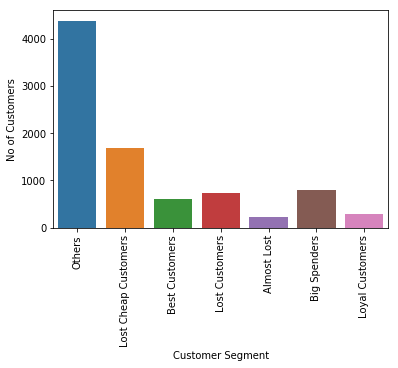

In [560]:
#Plot Customer Segment Data
sns.countplot(x='Segment', data=rfmsegmentation2)
plt.ylabel("No of Customers")
plt.xlabel("Customer Segment")
plt.xticks(rotation='vertical')
plt.show();

In [373]:
#Sales Data Analysis

In [374]:
rfmdm_sales = trans_items_cust_merge.copy(deep = True)

In [375]:
rfmdm_sales.head()

,index,transaction_number,customer_number,item_name,sale_amount,index:1,transaction_number:1,customer_number:1,transaction_time,store_name,sale_amount_including_loyalty_points_used,loyalty_points_used_by_customer,offer_used_by_customer_to_earn_loyalty_points,index:2,customer_number:2,app_install_time,gender,marital_status,date_of_birth,referral_as_source_of_app_install
0,0,463,3050,TOPPING SYRUPS,150.5,0,463,3050,2018-06-01 15:42:00,MUMBAI STORE 333,150.5,0.0,None,3049,3050,2018-06-01 15:40:24,MALE,None,2001-09-23,Not_through_referral
1,1,465,10736,MISCELLANEOUS,199.5,1,465,10736,2018-06-01 15:43:00,KANCHIPURAM STORE 72,199.5,0.0,None,10735,10736,2018-06-01 15:34:15,FEMALE,None,1999-07-26,Not_through_referral
2,2,467,3815,LATTE HOT COFFEE,118.0,2,467,3815,2018-06-01 17:34:00,CHENNAI STORE 1093,118.0,0.0,None,3814,3815,2018-06-01 17:26:23,FEMALE,None,1973-09-09,Not_through_referral
3,3,469,8590,AMERICAN HOT COFFEE,72.5,3,469,8590,2018-06-01 17:52:00,DHANBAD STORE 817,72.5,0.0,None,8589,8590,2018-06-01 17:09:19,MALE,None,2018-06-01,Not_through_referral
4,4,471,3315,COMBO24,177.0,4,471,3315,2018-06-01 17:56:00,MADURAI STORE 54,177.0,0.0,None,3314,3315,2018-06-01 17:42:59,MALE,None,1982-04-30,Not_through_referral


In [378]:
rfmdm_sales.columns

Index(['index', 'transaction_number', 'customer_number', 'item_name',
       'sale_amount', 'index:1', 'transaction_number:1', 'customer_number:1',
       'transaction_time', 'store_name',
       'sale_amount_including_loyalty_points_used',
       'loyalty_points_used_by_customer',
       'offer_used_by_customer_to_earn_loyalty_points', 'index:2',
       'customer_number:2', 'app_install_time', 'gender', 'marital_status',
       'date_of_birth', 'referral_as_source_of_app_install'],
      dtype='object')

In [390]:
rfmdm_sales_1 = rfmdm_sales[['transaction_number','transaction_time','sale_amount_including_loyalty_points_used']]

In [394]:
rfmdm_sales_1.head()
rfmdm_sales_1.info()

,transaction_number,transaction_time,sale_amount_including_loyalty_points_used
0,463,2018-06-01 15:42:00,150.5
1,465,2018-06-01 15:43:00,199.5
2,467,2018-06-01 17:34:00,118.0
3,469,2018-06-01 17:52:00,72.5
4,471,2018-06-01 17:56:00,177.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17972 entries, 0 to 17971
Data columns (total 3 columns):
transaction_number                           17972 non-null int64
transaction_time                             17972 non-null object
sale_amount_including_loyalty_points_used    17972 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 421.3+ KB


In [395]:
rfmdm_sales_1['transaction_time'] = pd.to_datetime(rfmdm_sales_1['transaction_time'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [396]:
rfmdm_sales_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17972 entries, 0 to 17971
Data columns (total 3 columns):
transaction_number                           17972 non-null int64
transaction_time                             17972 non-null datetime64[ns]
sale_amount_including_loyalty_points_used    17972 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 421.3 KB


In [397]:
rfmdm_sales_1.set_index('transaction_time', inplace = True)

In [398]:
rfmdm_sales_1.head()
rfmdm_sales_1.info()

,transaction_number,sale_amount_including_loyalty_points_used
transaction_time,,
2018-06-01 15:42:00,463,150.5
2018-06-01 15:43:00,465,199.5
2018-06-01 17:34:00,467,118.0
2018-06-01 17:52:00,469,72.5
2018-06-01 17:56:00,471,177.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17972 entries, 2018-06-01 15:42:00 to 2018-09-30 23:57:00
Data columns (total 2 columns):
transaction_number                           17972 non-null int64
sale_amount_including_loyalty_points_used    17972 non-null float64
dtypes: float64(1), int64(1)
memory usage: 421.2 KB


In [416]:
#Weekly Sampling
rfmdm_salesforecast_W = rfmdm_sales_1['sale_amount_including_loyalty_points_used'].resample('W').sum()

In [417]:
rfmdm_salesforecast_W.head()

transaction_time
2018-06-03     21679.0
2018-06-10     88209.5
2018-06-17    141209.0
2018-06-24    206673.5
2018-07-01    231830.5
Freq: W-SUN, Name: sale_amount_including_loyalty_points_used, dtype: float64

In [418]:
pd.isnull(rfmdm_salesforecast_W).any()

False

In [419]:
#Sales data plotting

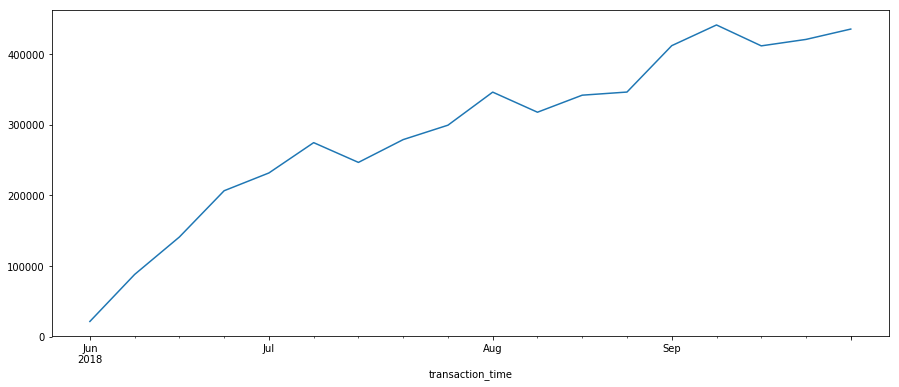

In [420]:
rfmdm_salesforecast_W.plot(figsize=(15,6))
#plt.xlabel("")
plt.show();

In [433]:
rfmdm_sales_2 = rfmdm_sales_1.copy(deep=True)

In [434]:
import calendar

In [435]:
rfmdm_sales_2.head()

,transaction_number,sale_amount_including_loyalty_points_used
transaction_time,,
2018-06-01 15:42:00,463,150.5
2018-06-01 15:43:00,465,199.5
2018-06-01 17:34:00,467,118.0
2018-06-01 17:52:00,469,72.5
2018-06-01 17:56:00,471,177.0


In [436]:
rfmdm_sales_2['WeekDay'] = rfmdm_sales_2.index.weekday_name

In [437]:
rfmdm_sales_2.head()

,transaction_number,sale_amount_including_loyalty_points_used,WeekDay
transaction_time,,,
2018-06-01 15:42:00,463,150.5,Friday
2018-06-01 15:43:00,465,199.5,Friday
2018-06-01 17:34:00,467,118.0,Friday
2018-06-01 17:52:00,469,72.5,Friday
2018-06-01 17:56:00,471,177.0,Friday


In [508]:
rfmdm_sales_2 = rfmdm_sales_2.rename(columns = {'sale_amount_including_loyalty_points_used':'TotalSales'})

In [510]:
rfmdm_sales_2.head()

,transaction_number,TotalSales,WeekDay
transaction_time,,,
2018-06-01 15:42:00,463,150.5,Friday
2018-06-01 15:43:00,465,199.5,Friday
2018-06-01 17:34:00,467,118.0,Friday
2018-06-01 17:52:00,469,72.5,Friday
2018-06-01 17:56:00,471,177.0,Friday


In [ ]:
#find out sales day-wise

In [511]:
rfmdm_sales_pivot = pd.pivot_table(rfmdm_sales_2,index=["WeekDay"],values = ["TotalSales"], aggfunc=np.sum)

In [512]:
rfmdm_sales_pivot

,TotalSales
WeekDay,
Friday,731559.5
Monday,647259.5
Saturday,979239.0
Sunday,1016908.5
Thursday,644494.0
Tuesday,586581.0
Wednesday,656778.0


In [513]:
#rfmdm_sales_pivot.rename(columns= {"sale_amount_including_loyalty_points_used":"TotalSales"})

In [516]:
rfmdm_sales_pivot.to_csv("D:\\DataSets\\rfmcoffeeshop\\rfmdm_sales_pivot.csv")

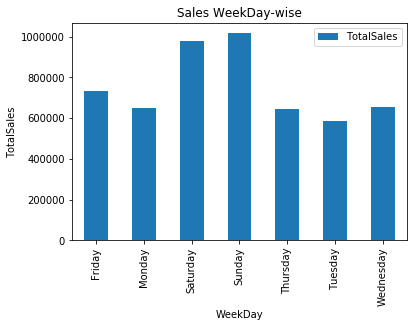

In [564]:
rfmdm_sales_pivot.plot(kind="bar")
plt.xlabel("WeekDay")
plt.ylabel("TotalSales")
plt.title("Sales WeekDay-wise")
plt.show();

In [467]:
#Check hourwise sales

In [518]:
rfmdm_sales_3 = rfmdm_sales_2.copy(deep = True)

In [519]:
rfmdm_sales_3['Hour'] = rfmdm_sales_3.index.hour

In [520]:
rfmdm_sales_3.head()

,transaction_number,TotalSales,WeekDay,Hour
transaction_time,,,,
2018-06-01 15:42:00,463,150.5,Friday,15
2018-06-01 15:43:00,465,199.5,Friday,15
2018-06-01 17:34:00,467,118.0,Friday,17
2018-06-01 17:52:00,469,72.5,Friday,17
2018-06-01 17:56:00,471,177.0,Friday,17


In [521]:
rfmdm_sales_pivot_hourly = pd.pivot_table(rfmdm_sales_3,index=["Hour"],values = ["TotalSales"], aggfunc=np.sum)

In [522]:
rfmdm_sales_pivot_hourly

,TotalSales
Hour,
0,104822.0
1,88251.0
2,55564.0
3,36325.0
4,30001.0
5,27896.0
6,16560.5
7,13983.5
8,20514.5


In [524]:
rfmdm_sales_pivot_hourly.to_csv("D:\\DataSets\\rfmcoffeeshop\\rfmdm_sales_pivot_hourlySales.csv")

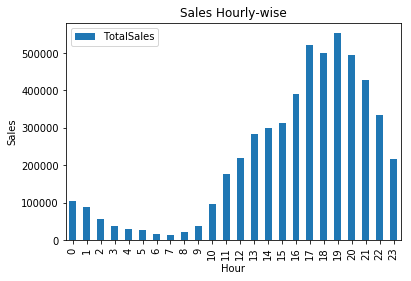

In [527]:
rfmdm_sales_pivot_hourly.plot(kind="bar")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.title("Sales Hourly-wise")
plt.show();

### find top selling products and least selling products by volume

In [287]:
#create the dataframes
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
products_perf = pd.read_sql("select item_name,count(*) as Count from trans_items_cust_merge group by item_name order by count(item_name) desc",conn)
print("dataframe got created successfully")

Opened database successfully
dataframe got created successfully


In [288]:
products_perf.shape
products_perf.info()

(320, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
item_name    319 non-null object
Count        320 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


In [530]:
#print top20 selling products
products_perf_top20 = products_perf.head(20)
print(products_perf_top20)

               item_name  Count
0          MISCELLANEOUS   2939
1                 FRAPPE   1952
2    AMERICAN HOT COFFEE   1677
3           CHEESE SLICE    838
4         TOPPING SYRUPS    735
5     VANILLA ICE CREAMS    603
6       DARK COLD COFFEE    509
7       LATTE HOT COFFEE    403
8     REGULAR HOT COFFEE    400
9              MILKSHAKE    374
10  FLAVOURED HTO COFFEE    327
11        HOT CAPPUCCINO    320
12                COMBO1    241
13        CRUNCHY FRAPPE    212
14   ESPRESSO HOT COFFEE    206
15     SUPER COLD COFFEE    204
16         WHIPPED CREAM    191
17                FOOD36    176
18       ADD ON ESPRESSO    171
19    ARABIAN HOT COFFEE    168


In [531]:
products_perf_top20.to_csv("D:\\DataSets\\rfmcoffeeshop\\products_perf_top20.csv")

In [532]:
products_perf_top20_1 = products_perf_top20.set_index("item_name")
products_perf_top20_1

,Count
item_name,
MISCELLANEOUS,2939
FRAPPE,1952
AMERICAN HOT COFFEE,1677
CHEESE SLICE,838
TOPPING SYRUPS,735
VANILLA ICE CREAMS,603
DARK COLD COFFEE,509
LATTE HOT COFFEE,403
REGULAR HOT COFFEE,400


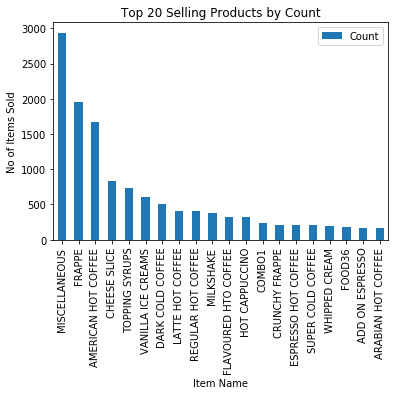

In [533]:
products_perf_top20_1.plot(kind="bar")
plt.xlabel("Item Name")
plt.ylabel("No of Items Sold")
plt.title("Top 20 Selling Products by Count")
plt.show();

In [291]:
#print bottom20 selling products
products_perf_bottom20 = products_perf.tail(20)
print(products_perf_bottom20)

        item_name  Count
300        FOOD45      1
301        FOOD47      1
302        FOOD55      1
303        FOOD59      1
304        FOOD61      1
305        FOOD74      1
306        FOOD76      1
307        FOOD79      1
308         FOOD8      1
309        FOOD82      1
310        FOOD86      1
311        FOOD89      1
312        FOOD94      1
313        FOOD97      1
314   ICE CREAM11      1
315   ICE CREAM13      1
316    ICE CREAM3      1
317        JUICES      1
318  NEW SMOOTHIE      1
319          None    274


In [353]:
products_perf_bottom20.to_csv("D:\\DataSets\\rfmcoffeeshop\\products_perf_bottom20.csv")

In [293]:
#contributio analysis...find top 10% revenue generating products and bottom 10% revenue generating products

In [294]:
#create the dataframes
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
prod_contribution = pd.read_sql("select item_name, sum(sale_amount) as Revenue from trans_items_cust_merge group by item_name order by sum(sale_amount) desc",conn)
print("dataframe got created successfully")

Opened database successfully
dataframe got created successfully


In [295]:
#do decile analysis
prod_contribution['Decile'] = pd.qcut(prod_contribution['Revenue'], 10, labels=False)
prod_contribution

,item_name,Revenue,Decile
0,MISCELLANEOUS,913742.0,9
1,FRAPPE,473588.0,9
2,AMERICAN HOT COFFEE,302844.5,9
3,CHEESE SLICE,290434.0,9
4,VANILLA ICE CREAMS,200157.5,9
5,TOPPING SYRUPS,196455.5,9
6,DARK COLD COFFEE,138453.0,9
7,REGULAR HOT COFFEE,104111.5,9
8,None,96904.5,9
9,LATTE HOT COFFEE,84474.5,9


In [296]:
prod_top10_revenue = prod_contribution.loc[prod_contribution['Decile']==9]
prod_top10_revenue.describe()
print("Top 10% revenue generating products")
prod_top10_revenue

,Revenue,Decile
count,32.000000,32.0
mean,118007.687500,9.0
std,176296.820075,0.0
min,26207.500000,9.0
25%,34794.000000,9.0
50%,51524.000000,9.0
75%,98706.250000,9.0
max,913742.000000,9.0


Top 10% revenue generating products


,item_name,Revenue,Decile
0,MISCELLANEOUS,913742.0,9
1,FRAPPE,473588.0,9
2,AMERICAN HOT COFFEE,302844.5,9
3,CHEESE SLICE,290434.0,9
4,VANILLA ICE CREAMS,200157.5,9
5,TOPPING SYRUPS,196455.5,9
6,DARK COLD COFFEE,138453.0,9
7,REGULAR HOT COFFEE,104111.5,9
8,None,96904.5,9
9,LATTE HOT COFFEE,84474.5,9


In [354]:
prod_top10_revenue.to_csv("D:\\Datasets\\rfmcoffeeshop\\prod_top10_revenue.csv")

In [535]:
#top 20 selling products by volume
prod_top10_revenue_top20 = prod_top10_revenue.head(20)

In [536]:
prod_top10_revenue_top20

,item_name,Revenue,Decile
0,MISCELLANEOUS,913742.0,9
1,FRAPPE,473588.0,9
2,AMERICAN HOT COFFEE,302844.5,9
3,CHEESE SLICE,290434.0,9
4,VANILLA ICE CREAMS,200157.5,9
5,TOPPING SYRUPS,196455.5,9
6,DARK COLD COFFEE,138453.0,9
7,REGULAR HOT COFFEE,104111.5,9
8,None,96904.5,9
9,LATTE HOT COFFEE,84474.5,9


In [537]:
del prod_top10_revenue_top20['Decile']

In [540]:
prod_top10_revenue_top20 = prod_top10_revenue_top20.set_index("item_name")
prod_top10_revenue_top20

,Revenue
item_name,
MISCELLANEOUS,913742.0
FRAPPE,473588.0
AMERICAN HOT COFFEE,302844.5
CHEESE SLICE,290434.0
VANILLA ICE CREAMS,200157.5
TOPPING SYRUPS,196455.5
DARK COLD COFFEE,138453.0
REGULAR HOT COFFEE,104111.5
NaN,96904.5


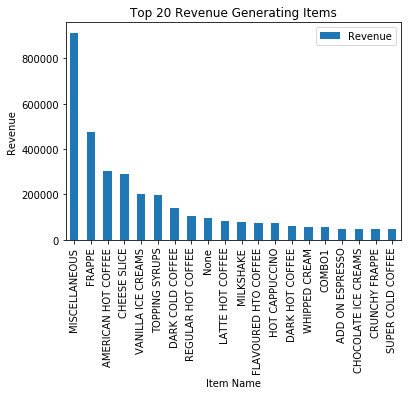

In [542]:
prod_top10_revenue_top20.plot(kind="bar")
plt.xlabel("Item Name")
plt.ylabel("Revenue")
plt.title("Top 20 Revenue Generating Items")
plt.show();

In [298]:
prod_bottom10_revenue = prod_contribution.loc[prod_contribution['Decile']==0]
prod_bottom10_revenue.describe()
print("Bottom 10% revenue generating products")
prod_bottom10_revenue

,Revenue,Decile
count,32.000000,32.0
mean,170.265625,0.0
std,86.675515,0.0
min,0.000000,0.0
25%,104.375000,0.0
50%,188.750000,0.0
75%,238.125000,0.0
max,296.500000,0.0


Bottom 10% revenue generating products


,item_name,Revenue,Decile
288,NEW SMOOTHIE,296.5,0
289,COCOA SPECIAL FOOD,293.0,0
290,COFFEE POWDER TYPE6,274.5,0
291,JUICES,260.0,0
292,FOOD59,255.5,0
293,COMBO106,254.5,0
294,ICED TEA,247.0,0
295,COMBO128,241.5,0
296,COMBO53,237.0,0
297,FOOD35,233.5,0


In [355]:
prod_bottom10_revenue.to_csv("D:\\Datasets\\rfmcoffeeshop\\prod_bottom10_revenue.csv")

In [300]:
###Contribution Analysis --top 10% revenue generating stores and bottom 10% reveneue generating stores

In [301]:
#create the dataframes
conn = sqlite3.connect('D:\\Database\\RFMAnalytics_CoffeShop.db')
print ("Opened database successfully")
store_contribution = pd.read_sql("select store_name, sum(sale_amount) as Revenue from trans_items_cust_merge group by store_name order by sum(sale_amount) desc",conn)
print("dataframe got created successfully")

Opened database successfully
dataframe got created successfully


In [302]:
#do decile analysis
store_contribution['Decile'] = pd.qcut(store_contribution['Revenue'], 10, labels=False)
store_contribution

,store_name,Revenue,Decile
0,CHENNAI STORE 14,105639.0,9
1,BANGALORE STORE 177,45796.5,9
2,BANGALORE STORE 1035,45178.5,9
3,DELHI STORE 1076,40727.0,9
4,PUNE STORE 397,38881.5,9
5,PANCHKULA STORE 645,38233.0,9
6,AURANGABAD STORE 1041,36071.0,9
7,DELHI STORE 506,32059.0,9
8,DELHI STORE 1156,31403.5,9
9,MEERUT STORE 1080,30975.0,9


In [303]:
store_top10_revenue = store_contribution.loc[store_contribution['Decile']==9]
store_top10_revenue.describe()

,Revenue,Decile
count,134.000000,134.0
mean,17302.485075,9.0
std,10986.256641,0.0
min,9150.000000,9.0
25%,10684.125000,9.0
50%,13943.250000,9.0
75%,20299.125000,9.0
max,105639.000000,9.0


In [304]:
print("Top 10% revenue generating stores")
store_top10_revenue

Top 10% revenue generating stores


,store_name,Revenue,Decile
0,CHENNAI STORE 14,105639.0,9
1,BANGALORE STORE 177,45796.5,9
2,BANGALORE STORE 1035,45178.5,9
3,DELHI STORE 1076,40727.0,9
4,PUNE STORE 397,38881.5,9
5,PANCHKULA STORE 645,38233.0,9
6,AURANGABAD STORE 1041,36071.0,9
7,DELHI STORE 506,32059.0,9
8,DELHI STORE 1156,31403.5,9
9,MEERUT STORE 1080,30975.0,9


In [356]:
store_top10_revenue.to_csv("D:\\Datasets\\rfmcoffeeshop\\store_top10_revenue.csv")

In [543]:
#Top 20 Revenue Generating Stores
store_top10_revenue_top20 = store_top10_revenue.head(20)

In [544]:
del store_top10_revenue_top20['Decile']

In [546]:
store_top10_revenue_top20 = store_top10_revenue_top20.set_index('store_name')
store_top10_revenue_top20

,Revenue
store_name,
CHENNAI STORE 14,105639.0
BANGALORE STORE 177,45796.5
BANGALORE STORE 1035,45178.5
DELHI STORE 1076,40727.0
PUNE STORE 397,38881.5
PANCHKULA STORE 645,38233.0
AURANGABAD STORE 1041,36071.0
DELHI STORE 506,32059.0
DELHI STORE 1156,31403.5


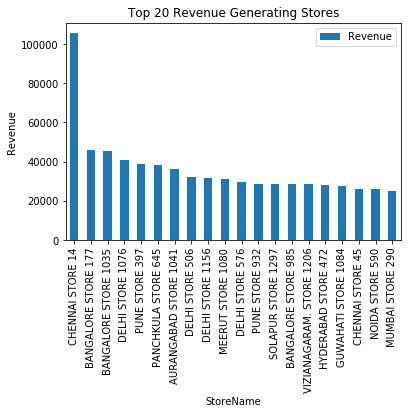

In [570]:
store_top10_revenue_top20.plot(kind="bar")
plt.xlabel("StoreName")
plt.ylabel("Revenue")
plt.title("Top 20 Revenue Generating Stores")
plt.show();

In [306]:
store_bottom10_revenue = store_contribution.loc[store_contribution['Decile']==0]
store_bottom10_revenue.describe()

,Revenue,Decile
count,134.000000,134.0
mean,122.869403,0.0
std,48.339531,0.0
min,19.500000,0.0
25%,79.000000,0.0
50%,120.000000,0.0
75%,162.375000,0.0
max,206.000000,0.0


In [569]:
print("Bottom 10% revenue generating stores")
store_bottom10_revenue.head(20)

Bottom 10% revenue generating stores


,store_name,Revenue,Decile
1199,AMRITSAR STORE 657,206.0,0
1200,PUNE STORE 931,206.0,0
1201,DELHI STORE 579,205.0,0
1202,PUNE STORE 369,204.0,0
1203,NAGPUR STORE 416,203.0,0
1204,BANGALORE STORE 99,202.5,0
1205,DELHI STORE 1063,201.5,0
1206,MUMBAI STORE 1088,201.5,0
1207,MYSORE STORE 223,200.0,0
1208,RANCHI STORE 1237,200.0,0


In [357]:
store_bottom10_revenue.to_csv("D:\\Datasets\\rfmcoffeeshop\\store_bottom10_revenue.csv")

In [309]:
#Perform apriori algorithm for market basket analysis

In [310]:
items.info()
items.shape
items.columns
pd.isnull(items).any()
pd.isnull(items).sum()
items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17972 entries, 0 to 17971
Data columns (total 4 columns):
transaction_number    17972 non-null int64
customer_number       17972 non-null int64
item_name             17698 non-null object
sale_amount           17972 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 561.7+ KB


(17972, 4)

Index(['transaction_number', 'customer_number', 'item_name', 'sale_amount'], dtype='object')

transaction_number    False
customer_number       False
item_name              True
sale_amount           False
dtype: bool

transaction_number      0
customer_number         0
item_name             274
sale_amount             0
dtype: int64

,transaction_number,customer_number,item_name,sale_amount
0,463,3050,TOPPING SYRUPS,150.5
1,465,10736,MISCELLANEOUS,199.5
2,467,3815,LATTE HOT COFFEE,118.0
3,469,8590,AMERICAN HOT COFFEE,72.5
4,471,3315,COMBO24,177.0


In [311]:
#remove items with item_name = null
items1 = items.dropna(subset=['item_name'], how='any')

In [312]:
items1.info()
items1.shape
items1.columns
pd.isnull(items1).any()
pd.isnull(items1).sum()
items1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17698 entries, 0 to 17971
Data columns (total 4 columns):
transaction_number    17698 non-null int64
customer_number       17698 non-null int64
item_name             17698 non-null object
sale_amount           17698 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 691.3+ KB


(17698, 4)

Index(['transaction_number', 'customer_number', 'item_name', 'sale_amount'], dtype='object')

transaction_number    False
customer_number       False
item_name             False
sale_amount           False
dtype: bool

transaction_number    0
customer_number       0
item_name             0
sale_amount           0
dtype: int64

,transaction_number,customer_number,item_name,sale_amount
0,463,3050,TOPPING SYRUPS,150.5
1,465,10736,MISCELLANEOUS,199.5
2,467,3815,LATTE HOT COFFEE,118.0
3,469,8590,AMERICAN HOT COFFEE,72.5
4,471,3315,COMBO24,177.0


In [358]:
items1.to_csv("D:\\DataSets\\rfmcoffeeshop\\items_no_null.csv")

In [314]:
#import libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [315]:
#add a column 'Quantity' wti default value = 1
items2 = items1.copy(deep = True)

In [316]:
items2['Quantity'] = 1

In [317]:
items2.info()
items2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17698 entries, 0 to 17971
Data columns (total 5 columns):
transaction_number    17698 non-null int64
customer_number       17698 non-null int64
item_name             17698 non-null object
sale_amount           17698 non-null float64
Quantity              17698 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 829.6+ KB


,transaction_number,customer_number,item_name,sale_amount,Quantity
0,463,3050,TOPPING SYRUPS,150.5,1
1,465,10736,MISCELLANEOUS,199.5,1
2,467,3815,LATTE HOT COFFEE,118.0,1
3,469,8590,AMERICAN HOT COFFEE,72.5,1
4,471,3315,COMBO24,177.0,1


In [318]:
#reorganize the data
items_pivot = pd.pivot_table(items2, index = 'transaction_number',columns = 'item_name', values = 'Quantity',fill_value=0)
items_pivot

item_name,ADD ON ESPRESSO,ADD ON TEA,AMERICAN HOT COFFEE,ARABIAN COLD COFFEE,ARABIAN HOT COFFEE,BIG HOT COFFEE,BIG LATTE,BLUEBERRY SHOT,BRAZILIAN HOT COFFEE,CHEESE SLICE,...,SNOW COLD COFFEE,SPARKLING COLD COFFEE,SUPER COLD COFFEE,SWEET JUICE,TOPPING,TOPPING SYRUPS,VANILLA ICE CREAMS,VEG PIZZA,VEGAN COLD COFFEE,WHIPPED CREAM
transaction_number,,,,,,,,,,,,,,,,,,,,,
463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
items_pivot.to_csv("D:\\DataSets\\rfmcoffeeshop\\items_pivot.csv")

In [320]:
items_pivot.shape

(16925, 319)

In [321]:
#apply apriori algorithm to generate rules which has support more than 0.01
frequent_itemset = apriori(items_pivot, min_support=0.00001, use_colnames=True )
frequent_itemset

,support,itemsets
0,0.009985,(ADD ON ESPRESSO)
1,0.001123,(ADD ON TEA)
2,0.098730,(AMERICAN HOT COFFEE)
3,0.002127,(ARABIAN COLD COFFEE)
4,0.009867,(ARABIAN HOT COFFEE)
5,0.000650,(BIG HOT COFFEE)
6,0.001418,(BIG LATTE)
7,0.000650,(BLUEBERRY SHOT)
8,0.000709,(BRAZILIAN HOT COFFEE)
9,0.049217,(CHEESE SLICE)


In [322]:
#find rules with lift more than one
rules = association_rules(frequent_itemset, metric = "lift",min_threshold=1)
rules.shape

(712, 9)

In [323]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BIG LATTE),(ADD ON ESPRESSO),0.001418,0.009985,0.000059,0.041667,4.172830,0.000045,1.033059
1,(ADD ON ESPRESSO),(BIG LATTE),0.009985,0.001418,0.000059,0.005917,4.172830,0.000045,1.004526
2,(FOOD120),(ADD ON ESPRESSO),0.000532,0.009985,0.000118,0.222222,22.255095,0.000113,1.272876
3,(ADD ON ESPRESSO),(FOOD120),0.009985,0.000532,0.000118,0.011834,22.255095,0.000113,1.011438
4,(FOOD132),(ADD ON ESPRESSO),0.002836,0.009985,0.000059,0.020833,2.086415,0.000031,1.011079


In [324]:
#select only the rules which has lift >10 and confidence of 0.02
rules1 = rules[(rules['lift']>=10) & (rules['confidence']>=0.5)]

In [565]:
rules1.shape
rules1.head(20)

(115, 9)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34,(COFFEE POWDER TYPE8),(CHEESE SLICE),0.000059,0.049217,0.000059,1.0,20.318127,0.000056,inf
39,(COMBO107),(CHEESE SLICE),0.000059,0.049217,0.000059,1.0,20.318127,0.000056,inf
58,(FOOD68),(CHEESE SLICE),0.000236,0.049217,0.000118,0.5,10.159064,0.000107,1.901566
70,(COFFEE POWDER TYPE7),(COMBO9),0.000059,0.001064,0.000059,1.0,940.277778,0.000059,inf
76,(COMBO129),(COMBO1),0.000118,0.014121,0.000059,0.5,35.407950,0.000057,1.971758
86,(COMBO42),(COMBO102),0.000118,0.000827,0.000059,0.5,604.464286,0.000059,1.998346
102,(COMBO128),(COMBO132),0.000059,0.000059,0.000059,1.0,16925.000000,0.000059,inf
103,(COMBO132),(COMBO128),0.000059,0.000059,0.000059,1.0,16925.000000,0.000059,inf
111,(COMBO134),(COMBO47),0.000059,0.000177,0.000059,1.0,5641.666667,0.000059,inf
204,(FLAVOURED TEA19),(TOPPING SYRUPS),0.000059,0.042659,0.000059,1.0,23.441828,0.000057,inf


In [567]:
rules2 = rules1[['antecedents','consequents']]

In [568]:
rules2.head(20)

,antecedents,consequents
34,(COFFEE POWDER TYPE8),(CHEESE SLICE)
39,(COMBO107),(CHEESE SLICE)
58,(FOOD68),(CHEESE SLICE)
70,(COFFEE POWDER TYPE7),(COMBO9)
76,(COMBO129),(COMBO1)
86,(COMBO42),(COMBO102)
102,(COMBO128),(COMBO132)
103,(COMBO132),(COMBO128)
111,(COMBO134),(COMBO47)
204,(FLAVOURED TEA19),(TOPPING SYRUPS)
